In [6]:
from algorithms import UtilityMatrix
from agents import User
from simulator import Simulator
from rewards import RewardFunctionExponential, RewardFunctionSquaredExponential
from samplersRecommendation import UniformSamplerRecommendation
from parameters import ParametersUser, ParametersPopulation
from utils import Opinion

Define parameters

In [7]:
reward = RewardFunctionSquaredExponential(decay_parameter=1.0)
recommendation_sampler = UniformSamplerRecommendation(low=-1.0, high=1.0)

parameters = ParametersUser(prejudice=Opinion(0.0),
                            weight_prejudice=0.2,
                            weight_recommendation=0.3,
                            weight_current_opinion=0.5,
                            reward=reward)

Define a user and algorithm

In [8]:
user = User(initial_state=Opinion(0.0),
            parameters=parameters,
            save_history=True)

alg = UtilityMatrix(n_agents=1,
                    recommendation_sampler=recommendation_sampler,
                    exploration_probability=0.0, # probability of exploring at every time step
                    exploration_frequency=10) # force exploration every exploration_frequency steps

In [9]:
# Simulation
simulator = Simulator(agent=user,
                      algorithm=alg)

# Run
simulator.run(horizon=1000)

Plot all results

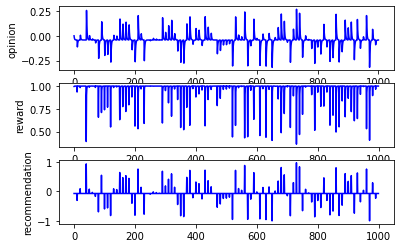

In [10]:
# Plot
simulator.agent.plot(save=False)